In [244]:
path = "/Users/Merlin/Downloads/Datasets/capstone_df.csv"

pip install nltk --upgrade

In [245]:
import pandas as pd

In [246]:
df = pd.read_csv(path, index_col=0)

In [247]:
df

,question,choices,answer,line,showContext,heading_name,saved,type,saved.question,saved.choices,...,saved.heading_name,saved.type,book_id,book_name,chapters.chapter_name,chapters.chapter_content,chapters.keyphrase_saved_Question_count,chapters.example_question_saved_count,chapters.keyphrase_question_nonsaved_count,chapters.example_nonsaved_count
0,Net income under _____________ is unaffected...,"['Variable Cost Per Unit', 'Whenever Units Pro...",Variable Costing,Net income under variable costing is unaffecte...,<p><b>Excerpt from Chapter: Chapter 19 Cost-Vo...,Learning Objectives Review,True,Keyphrase,Net income under variable costing&nbsp;is unaf...,"['Production Capacity', 'Prices', 'Total Costs...",...,Learning Objectives Review,Keyphrase,120,Accounts,Chapter 19 Cost-Volume-Profit Analysis: Additi...,\n\n\n\n\n\nAs the following Feature Story abo...,56,16,893,9
1,A _____________ is an authorization form pre...,"['Apple Inc', 'Cisco', 'Supplies Expense', 'Ad...",Voucher,A voucher is an authorization form prepared fo...,"<p><b>Excerpt from Chapter: Chapter 7: Fraud, ...",Voucher System Controls,True,Keyphrase,A(n) _____________ is an authorization form pr...,"['voucher', 'supplies expense', 'accrued reven...",...,Voucher System Controls,Keyphrase,120,Accounts,"Chapter 7: Fraud, Internal Control, and Cash",\n\n\n\n\n\nAs the following Feature Story abo...,44,22,901,0
2,"In contrast, under _____________ , all fixed ...","['Variable Cost Per Unit', 'Whenever Units Pro...",Variable Costing,"In contrast, under variable costing, all fixed...",<p><b>Excerpt from Chapter: Chapter 19 Cost-Vo...,Variable Costing Example,True,Keyphrase,"Under ____________ costing, all ____________ m...","['Variable; Variable', 'Variable; Fixed', 'Fix...",...,Variable Costing Example,Keyphrase,120,Accounts,Chapter 19 Cost-Volume-Profit Analysis: Additi...,\n\n\n\n\n\nAs the following Feature Story abo...,56,16,893,9
3,It is an earnings amount calculated as net inc...,"['Nike, Inc.', 'CPA', 'American Accounting Ass...",Stock,It is an earnings amount calculated as net inc...,<p><b>Excerpt from Chapter: Chapter 2: A Furth...,Decision Tools,True,Keyphrase,_____________ is the amount calculated as net ...,"['Retained Earnings; Bonds', 'Earnings Availab...",...,Decision Tools,Keyphrase,120,Accounts,Chapter 2: A Further Look at Financial Statements,\n\n\n\n\n\nIf you are thinking of purchasing ...,68,21,656,0
4,"For example, Nike golf clubs are sold at local...","['Differences', 'Similarities', 'HELPFUL HINT'...",What's Cooking?,"For example, Nike golf clubs are sold at local...",<p><b>Excerpt from Chapter: Chapter 8: Reporti...,What's Cooking?,True,Example,"When the due date is stated in months, the tim...","['Valuing Notes Receivable', 'Computing Intere...",...,What's Cooking?,Example,120,Accounts,Chapter 8: Reporting and Analyzing Receivables,"\n\n\n\n\n\nIn this chapter, we discuss some o...",34,18,1057,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16674,This diagram of a typical parasitic flatworm s...,"['Gut', 'central nervous systems', 'chordates'...",Gut,This diagram of a typical parasitic flatworm s...,\n A common ancestor is shared by Lophotrochoz...,Flatworms,False,Keyphrase,NaN,NaN,...,NaN,NaN,133,principle of life,Chapter 22 Animal Origins and Diversity,\n\n\nOf the 1.8 million species of life that ...,41,159,975,247
16675,"As you will see, an important property for __...","['Lipids', 'Lipid Structures', 'Triglyceride',...",Lipids,"As you will see, an important property for lip...","\n <dfn epub:type=""keyword"" class=""keyword"" id...",Lipids are structurally and functionally diverse,False,Keyphrase,NaN,NaN,...,NaN,NaN,133,principle of life,Chapter 3 Macromolecules,"\n\n\nTypical cells, such as those shown here ...",36,61,707,274
16676,"Humans have only carotid bodies, which are fou...","['Lumen', 'vascular endothelium', 'Arteries', ...",Arteries,"Humans have only carotid bodies, which are fou...",\n You 

In [248]:
df.drop(['choices', 'line', 'showContext', 'type',
       'heading_name', 'saved.choices',
       'saved.showContext', 'saved.heading_name', 'saved.type',
       'book_id','chapters.chapter_name',
       'chapters.chapter_content', 'chapters.keyphrase_saved_Question_count',
       'chapters.example_question_saved_count',
       'chapters.keyphrase_question_nonsaved_count',
       'chapters.example_nonsaved_count'], axis = 1, inplace = True)

In [327]:
df.rename(columns = {'ai_generated':'ai_generated_question', 'saved.question':'edited_saved_question', 'saved.answer':'saved_answer'}, inplace = True)

In [328]:
generated_non_saved = df[df['saved'] == False]

In [329]:
generated_non_saved.rename(columns = {'ai_generated_question' : 'nonsaved_generated_question'}, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [330]:
generated_non_saved = generated_non_saved[['nonsaved_generated_question']]

In [331]:
generated_non_saved

,nonsaved_generated_question
347,"Service Revenue $132,000 Dividends $ 9,000 S..."
348,"And finally, to accomplish over-the-top delici..."
349,"For example, assuming that Stassi Corporation ..."
350,"Communication Activity CT12.8 Walt Jax, the ow..."
351,"During June, 29,000 units of direct materials ..."
...,...
16674,This diagram of a typical parasitic flatworm s...
16675,"As you will see, an important property for Li..."
16676,"Humans have only carotid bodies, which are fou..."
16677,The Ciliates are much more complex in body f...


In [323]:
generated_saved = df[df['saved'] == True]

generated_saved.rename(columns = {'ai_generated_question' : 'saved_generated_question'}, inplace = True)

generated_saved = generated_saved[['saved_generated_question']]

saved_generated_question = generated_saved['saved_generated_question'].tolist()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,saved_generated_question
0,Net income under Variable Costing is unaffec...
1,A Voucher is an authorization form prepared ...
2,"In contrast, under Variable Costing , all fix..."
3,It is an earnings amount calculated as net inc...
4,"For example, Nike golf clubs are sold at local..."
...,...
12351,FIGURE 16.16 A Hybrid Zone The narrow zone i...
12352,"<p><img src=""http://d1q3p76q2qt5dz.cloudfront...."
12353,"Dna is a double-stranded molecule—that is, i..."
12354,An atom consists of a nucleus containing Prot...


In [332]:
saved_generated_question = generated_saved['saved_generated_question'].tolist()
non_saved_generated_question = generated_non_saved['nonsaved_generated_question'].tolist()

In [335]:

saved_generated_question_tags = pos_tag_sents(map(word_tokenize, saved_generated_question))


In [336]:
nonsaved_generated_question_tags = pos_tag_sents(map(word_tokenize, non_saved_generated_question))

In [359]:
nonedit_nonsaved

[['NNP',
  'NNP',
  '$',
  'CD',
  'NNP',
  '$',
  'CD',
  'NNS',
  'NN',
  'CD',
  'NNP',
  'JJ',
  'CD',
  'NNPS',
  'JJ',
  'CD',
  'NNS',
  'IN',
  'CD',
  'CD',
  'NNP',
  'CD',
  'NNP',
  'CD',
  'NNP',
  'CD',
  'NNP',
  'NN',
  'CD',
  'VBD',
  'NNS',
  'CD',
  'NNS',
  'DT',
  '.'],
 ['CC',
  'RB',
  ',',
  'TO',
  'VB',
  'JJ',
  'NN',
  'IN',
  'JJ',
  'NN',
  ',',
  'NNP',
  'VBZ',
  'VBP',
  'NN',
  'CC',
  'VBD',
  'NN',
  'NN',
  '.'],
 ['IN',
  'NN',
  ',',
  'VBG',
  'IN',
  'NNP',
  'NNP',
  'VBZ',
  'DT',
  'JJ',
  'NN',
  'IN',
  '$',
  'CD',
  'CC',
  'DT',
  'CD',
  'NN',
  'NN',
  'NN',
  ',',
  'DT',
  'JJ',
  'NN',
  'MD',
  'VB',
  'VBN',
  'IN',
  ',',
  'NN',
  'IN',
  'NN',
  ',',
  'IN',
  'VBN',
  'IN',
  'NNP',
  'CD',
  '.'],
 ['NN',
  'NNP',
  'NNP',
  'NNP',
  'NNP',
  ',',
  'DT',
  'NN',
  'IN',
  'NNP',
  'NNPS',
  'NNP',
  ',',
  'VBZ',
  'JJ',
  'IN',
  'DT',
  'NNP',
  'IN',
  'NNP',
  'NNP',
  'IN',
  'PRP',
  ',',
  'IN',
  'PRP$',
  'NN',
  '

In [357]:
nonedit_saved = [[item[1] for item in question] for question in saved_generated_question_tags]

nonedit_nonsaved = [[item[1] for item in question] for question in nonsaved_generated_question_tags]

In [360]:
#flatten list of list
nonedit_saved_list = []
for item in nonedit_saved:
    for tags in item:
        nonedit_saved_list.append(tags)


In [ ]:
#flatten list of list
nonedit_nonsaved_list = []
for item in nonedit_nonsaved:
    for tags in item:
        nonedit_nonsaved.append(tags)

In [ ]:
nonedit_questions_postag_df = pd.DataFrame({'nonedit_nonsaved_questions_tags': pd.Series(nonedit_nonsaved_list), 'nonedit_saved_question_tags': pd.Series(nonedit_saved_list)})

In [ ]:
nonedit_questions_postag_df

In [343]:
question_melt = pd.melt(nonedit_questions_postag_df)

In [345]:
question_melt = question_melt.dropna()

In [347]:
question_melt

,variable,value
0,nonedit_nonsaved_questions_tags,"[NNP, NNP, $, CD, NNP, $, CD, NNS, NN, CD, NNP..."
1,nonedit_nonsaved_questions_tags,"[CC, RB, ,, TO, VB, JJ, NN, IN, JJ, NN, ,, NNP..."
2,nonedit_nonsaved_questions_tags,"[IN, NN, ,, VBG, IN, NNP, NNP, VBZ, DT, JJ, NN..."
3,nonedit_nonsaved_questions_tags,"[NN, NNP, NNP, NNP, NNP, ,, DT, NN, IN, NNP, N..."
4,nonedit_nonsaved_questions_tags,"[IN, NNP, ,, CD, NNS, IN, JJ, NNS, VBP, VBN, I..."
...,...,...
16674,nonedit_saved_question_tags,"[NNP, CD, NNP, NNP, NNP, DT, JJ, NN, IN, WDT, ..."
16675,nonedit_saved_question_tags,"[JJ, NN, NNP, NNP, NN, NN, '', NN, :, NN, '', ..."
16676,nonedit_saved_question_tags,"[NNP, VBZ, DT, JJ, NN, VBZ, ,, PRP, VBZ, IN, C..."
16677,nonedit_saved_question_tags,"[DT, JJ, NNS, IN, DT, JJ, NN, NNS, CC, NNS, ,,..."


In [346]:
plt.figure(figsize=(30,12))
sns.set(font_scale = 1.2)

ax = sns.countplot(x="value", data=question_melt, hue = 'variable', 
                   order=question_melt.value.value_counts().iloc[:15].index)
plt.title('PoS Tag Frequency between Unedited Saved and Edited Saved Questions')
plt.xlabel('Tag name')

ncount = len(question_melt)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# # Fix the frequency range to 0-100
# ax2.set_ylim(0,100)
# ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

TypeError: unhashable type: 'list'

<Figure size 2160x864 with 0 Axes>

## Replace "_" with "ANSWER"

In [258]:
df['ai_generated_question'] = df['ai_generated_question'].apply(lambda x: str(x).replace('_', '<ANSWER>',1).replace('_', ''))

df['edited_saved_question'] = df['edited_saved_question'].apply(lambda x: str(x).replace('_', '<ANSWER>',1).replace('_', ''))

In [259]:
## replace <ANSWER> with actual answer
df["ai_generated_question"]= df.apply(lambda x: x['ai_generated_question'].replace('<ANSWER>', str(x['answer'])), axis=1)
df["edited_saved_question"]= df.apply(lambda x: x['edited_saved_question'].replace('<ANSWER>', str(x['saved_answer'])), axis=1)

In [261]:
df.head(0)

,ai_generated_question,answer,saved,edited_saved_question,saved_answer,book_name


## POS tagging

In [262]:
from nltk import word_tokenize, pos_tag, pos_tag_sents

In [263]:
ai_question = df['ai_generated_question'].tolist()

tagged_ai_question = pos_tag_sents(map(word_tokenize, ai_question))

df['POS_ai_question'] = tagged_ai_question

In [264]:
saved_question = df['edited_saved_question'].tolist()

tagged_saved_question = pos_tag_sents(map(word_tokenize, saved_question))

df['POS_saved_question'] = tagged_saved_question

In [265]:
tagged_ai_question_tagsOnly = [[item[1] for item in question] for question in tagged_ai_question]

In [266]:
tagged_saved_question_tagsOnly = [[item[1] for item in question] for question in tagged_saved_question]

In [267]:
df['POS_ai_question_tags'] = tagged_ai_question_tagsOnly

In [268]:
df['POS_saved_question_tags'] = tagged_saved_question_tagsOnly

In [269]:
df['edited_saved_question'] = df['edited_saved_question'].replace(['nan'],'')

In [272]:
df

,ai_generated_question,answer,saved,edited_saved_question,saved_answer,book_name,POS_ai_question,POS_saved_question,POS_ai_question_tags,POS_saved_question_tags
0,Net income under Variable Costing is unaffec...,Variable Costing,True,Net income under variable costing&nbsp;is unaf...,Sales,Accounts,"[(Net, JJ), (income, NN), (under, IN), (Variab...","[(Net, JJ), (income, NN), (under, IN), (variab...","[JJ, NN, IN, JJ, NNP, VBZ, VBN, IN, NNS, IN, N...","[JJ, NN, IN, JJ, NN, CC, NN, :, VBZ, VBN, IN, ..."
1,A Voucher is an authorization form prepared ...,Voucher,True,A(n) voucher is an authorization form prepared...,voucher,Accounts,"[(A, DT), (Voucher, NNP), (is, VBZ), (an, DT),...","[(A, DT), ((, (), (n, NN), (), )), (voucher, N...","[DT, NNP, VBZ, DT, NN, NN, VBN, IN, DT, NN, .]","[DT, (, NN, ), NN, VBZ, DT, NN, NN, VBN, IN, D..."
2,"In contrast, under Variable Costing , all fix...",Variable Costing,True,"Under Variable; Fixed costing, all manufactur...",Variable; Fixed,Accounts,"[(In, IN), (contrast, NN), (,, ,), (under, IN)...","[(Under, IN), (Variable, NNP), (;, :), (Fixed,...","[IN, NN, ,, IN, JJ, NNP, ,, DT, JJ, NN, NNS, V...","[IN, NNP, :, NNP, NN, ,, DT, NN, NNS, VBP, VBN..."
3,It is an earnings amount calculated as net inc...,Stock,True,Earnings Available to Common Stockholders; Sto...,Earnings Available to Common Stockholders; Stock,Accounts,"[(It, PRP), (is, VBZ), (an, DT), (earnings, NN...","[(Earnings, NNS), (Available, JJ), (to, TO), (...","[PRP, VBZ, DT, NNS, NN, VBD, IN, JJ, NN, JJR, ...","[NNS, JJ, TO, NNP, NNP, :, NNP, VBZ, DT, NN, V..."
4,"For example, Nike golf clubs are sold at local...",What's Cooking?,True,"When the due date is stated in months, the tim...",Computing Interest of Notes Receivable,Accounts,"[(For, IN), (example, NN), (,, ,), (Nike, NNP)...","[(When, WRB), (the, DT), (due, JJ), (date, NN)...","[IN, NN, ,, NNP, NN, NNS, VBP, VBN, IN, JJ, NN...","[WRB, DT, JJ, NN, VBZ, VBN, IN, NNS, ,, DT, NN..."
...,...,...,...,...,...,...,...,...,...,...
16674,This diagram of a typical parasitic flatworm s...,Gut,False,,NaN,principle of life,"[(This, DT), (diagram, NN), (of, IN), (a, DT),...","[(nan, NN)]","[DT, NN, IN, DT, JJ, JJ, NN, VBZ, DT, JJ, NNS,...",[NN]
16675,"As you will see, an important property for Li...",Lipids,False,,NaN,principle of life,"[(As, IN), (you, PRP), (will, MD), (see, VB), ...","[(nan, NN)]","[IN, PRP, MD, VB, ,, DT, JJ, NN, IN, NNP, IN, ...",[NN]
16676,"Humans have only carotid bodies, which are fou...",Arteries,False,,NaN,principle of life,"[(Humans, NNS), (have, VBP), (only, RB), (caro...","[(nan, NN)]","[NNS, VBP, RB, JJ, NNS, ,, WDT, VBP, VBN, IN, ...",[NN]
16677,The Ciliates are much more complex in body f...,Ciliates,False,,NaN,principle of life,"[(The, DT), (Ciliates, NNPS), (are, VBP), (muc...","[(nan, NN)]","[DT, NNPS, VBP, RB, RBR, JJ, IN, NN, NN, IN, V...",[NN]


In [273]:
#flatten list of list
flatten_ai_question_tagsOnly = []
for item in tagged_ai_question_tagsOnly:
    for tags in item:
        flatten_ai_question_tagsOnly.append(tags)

In [274]:

#flatten list of list
flatten_saved_question_tagsOnly = []
for item in tagged_saved_question_tagsOnly:
    for tags in item:
        flatten_saved_question_tagsOnly.append(tags)

In [275]:
flatten_ai_question_tagsOnly

['JJ',
 'NN',
 'IN',
 'JJ',
 'NNP',
 'VBZ',
 'VBN',
 'IN',
 'NNS',
 'IN',
 'NN',
 'NNS',
 '.',
 'DT',
 'NNP',
 'VBZ',
 'DT',
 'NN',
 'NN',
 'VBN',
 'IN',
 'DT',
 'NN',
 '.',
 'IN',
 'NN',
 ',',
 'IN',
 'JJ',
 'NNP',
 ',',
 'DT',
 'JJ',
 'NN',
 'NNS',
 'VBP',
 'VBN',
 'IN',
 'DT',
 'JJ',
 'NN',
 '.',
 'PRP',
 'VBZ',
 'DT',
 'NNS',
 'NN',
 'VBD',
 'IN',
 'JJ',
 'NN',
 'JJR',
 'NNS',
 'VBN',
 'IN',
 'DT',
 'NN',
 'IN',
 'NNP',
 ',',
 'VBD',
 'VBN',
 '.',
 'IN',
 'NN',
 ',',
 'NNP',
 'NN',
 'NNS',
 'VBP',
 'VBN',
 'IN',
 'JJ',
 'NN',
 'NNS',
 'CC',
 'NN',
 'NNS',
 'IN',
 'DT',
 'NN',
 ',',
 'IN',
 'NN',
 'NN',
 'MD',
 'VB',
 'VBN',
 'RB',
 'TO',
 'NNS',
 'IN',
 'NNP',
 'NNS',
 '.',
 'NNP',
 'IN',
 'DT',
 'NN',
 'VBZ',
 'DT',
 'DT',
 'NN',
 'IN',
 '.',
 'DT',
 '$',
 'CD',
 'NN',
 'IN',
 'NNP',
 'VBZ',
 'VBN',
 'TO',
 'NNS',
 'JJ',
 'IN',
 '$',
 'CD',
 'CC',
 'VBD',
 'TO',
 'NNP',
 'IN',
 '$',
 'CD',
 '.',
 'JJ',
 'NN',
 'NNP',
 'NNP',
 'NN',
 'NN',
 "''",
 'NN',
 ':',
 'JJ',
 "''",
 'NN',
 

In [276]:
flatten_saved_question_tagsOnly

['JJ',
 'NN',
 'IN',
 'JJ',
 'NN',
 'CC',
 'NN',
 ':',
 'VBZ',
 'VBN',
 'IN',
 'NNS',
 'IN',
 'NN',
 'NN',
 'CC',
 'NN',
 ':',
 'JJ',
 'NN',
 'IN',
 'JJ',
 'NN',
 'VBZ',
 'VBN',
 'IN',
 'NNS',
 'IN',
 'NN',
 'NNS',
 '.',
 'RB',
 ',',
 'PRP',
 'VBZ',
 'RB',
 'VBN',
 'TO',
 'NNS',
 'IN',
 'NNS',
 '.',
 'DT',
 '(',
 'NN',
 ')',
 'NN',
 'VBZ',
 'DT',
 'NN',
 'NN',
 'VBN',
 'IN',
 'DT',
 'NN',
 '.',
 'IN',
 'NNP',
 ':',
 'NNP',
 'NN',
 ',',
 'DT',
 'NN',
 'NNS',
 'VBP',
 'VBN',
 'IN',
 'DT',
 'JJ',
 'NN',
 '.',
 'NNS',
 'JJ',
 'TO',
 'NNP',
 'NNP',
 ':',
 'NNP',
 'VBZ',
 'DT',
 'NN',
 'VBD',
 'IN',
 'JJ',
 'NN',
 'CC',
 'DT',
 'NNS',
 'VBN',
 'IN',
 'DT',
 'NN',
 'IN',
 'NN',
 ',',
 'VBN',
 'VBN',
 '.',
 'WRB',
 'DT',
 'JJ',
 'NN',
 'VBZ',
 'VBN',
 'IN',
 'NNS',
 ',',
 'DT',
 'NN',
 'NN',
 'IN',
 'DT',
 'NN',
 'VBZ',
 'DT',
 'NN',
 'IN',
 'NNS',
 'VBN',
 'IN',
 'CD',
 '.',
 'VBG',
 'DT',
 'NN',
 'JJ',
 'IN',
 'NN',
 'NNS',
 'DT',
 'NNS',
 'IN',
 'DT',
 'NN',
 'NN',
 'IN',
 'VBG',
 'CC',
 'N

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

In [293]:
#create pos tag dataframe
postag_df = pd.DataFrame({'non_edited_question_tags': pd.Series(flatten_ai_question_tagsOnly), 'edited_saved_question_tags': pd.Series(flatten_saved_question_tagsOnly)})

In [294]:
postag_df_temp = postag_df.dropna()

In [295]:
postag_df_temp_melt = pd.melt(postag_df_temp)

In [281]:
sum(postag_df.edited_saved_question_tags.notna())


59785

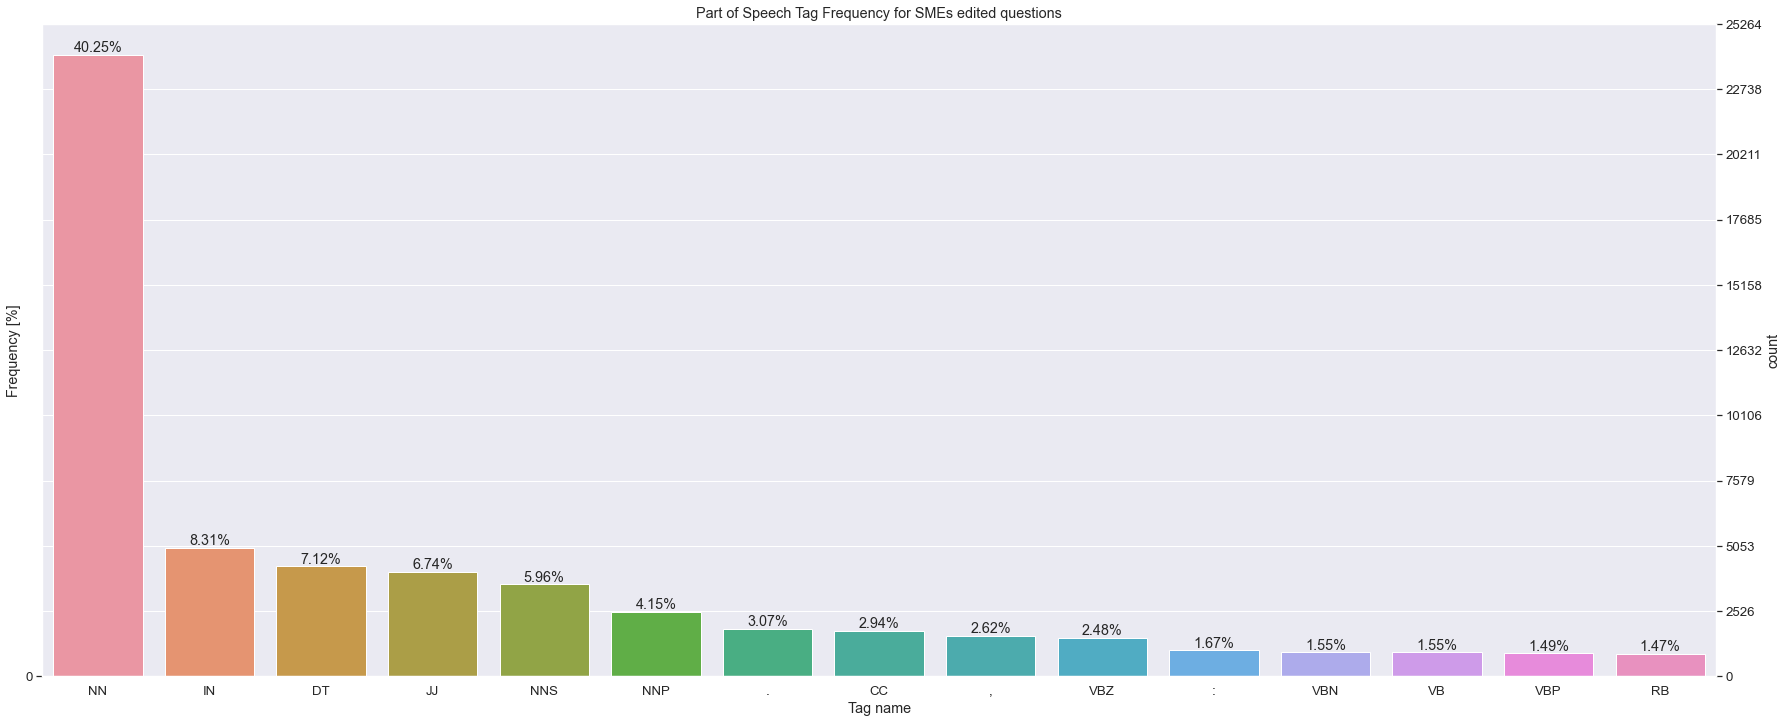

In [286]:
plt.figure(figsize=(30,12))
ax = sns.countplot(x="edited_saved_question_tags", data=postag_df, order=postag_df.edited_saved_question_tags.value_counts().iloc[:15].index)
plt.title('Part of Speech Tag Frequency for SMEs edited questions')
plt.xlabel('Tag name')

ncount = sum(postag_df.edited_saved_question_tags.notna())
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# # Fix the frequency range to 0-100
# ax2.set_ylim(0,100)
# ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)


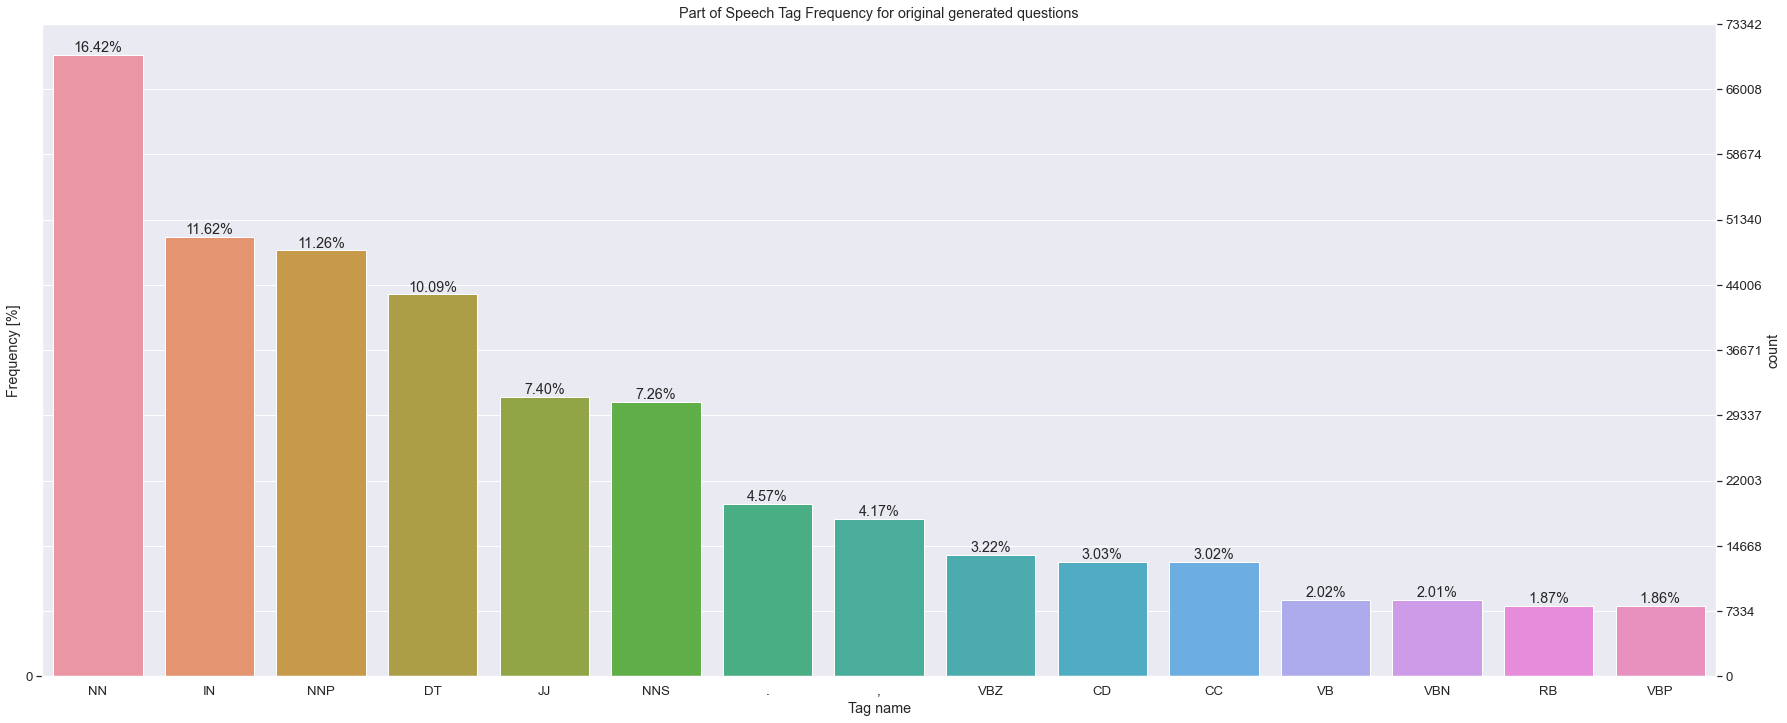

In [288]:
plt.figure(figsize=(30,12))
ax = sns.countplot(x="generated_question_tags", data=postag_df, order=postag_df.generated_question_tags.value_counts().iloc[:15].index)
plt.title('Part of Speech Tag Frequency for original generated questions')
plt.xlabel('Tag name')

ncount = sum(postag_df.generated_question_tags.notna())
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# # Fix the frequency range to 0-100
# ax2.set_ylim(0,100)
# ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [289]:
melt_df = pd.melt(postag_df)

In [348]:
postag_df

,non_edited_question_tags,edited_saved_question_tags
0,JJ,JJ
1,NN,NN
2,IN,IN
3,JJ,JJ
4,NNP,NN
...,...,...
425269,JJ,NaN
425270,NNS,NaN
425271,IN,NaN
425272,NNP,NaN


In [290]:
melt_df.dropna()

,variable,value
0,generated_question_tags,JJ
1,generated_question_tags,NN
2,generated_question_tags,IN
3,generated_question_tags,JJ
4,generated_question_tags,NNP
...,...,...
485054,edited_saved_question_tags,NN
485055,edited_saved_question_tags,NN
485056,edited_saved_question_tags,NN
485057,edited_saved_question_tags,NN


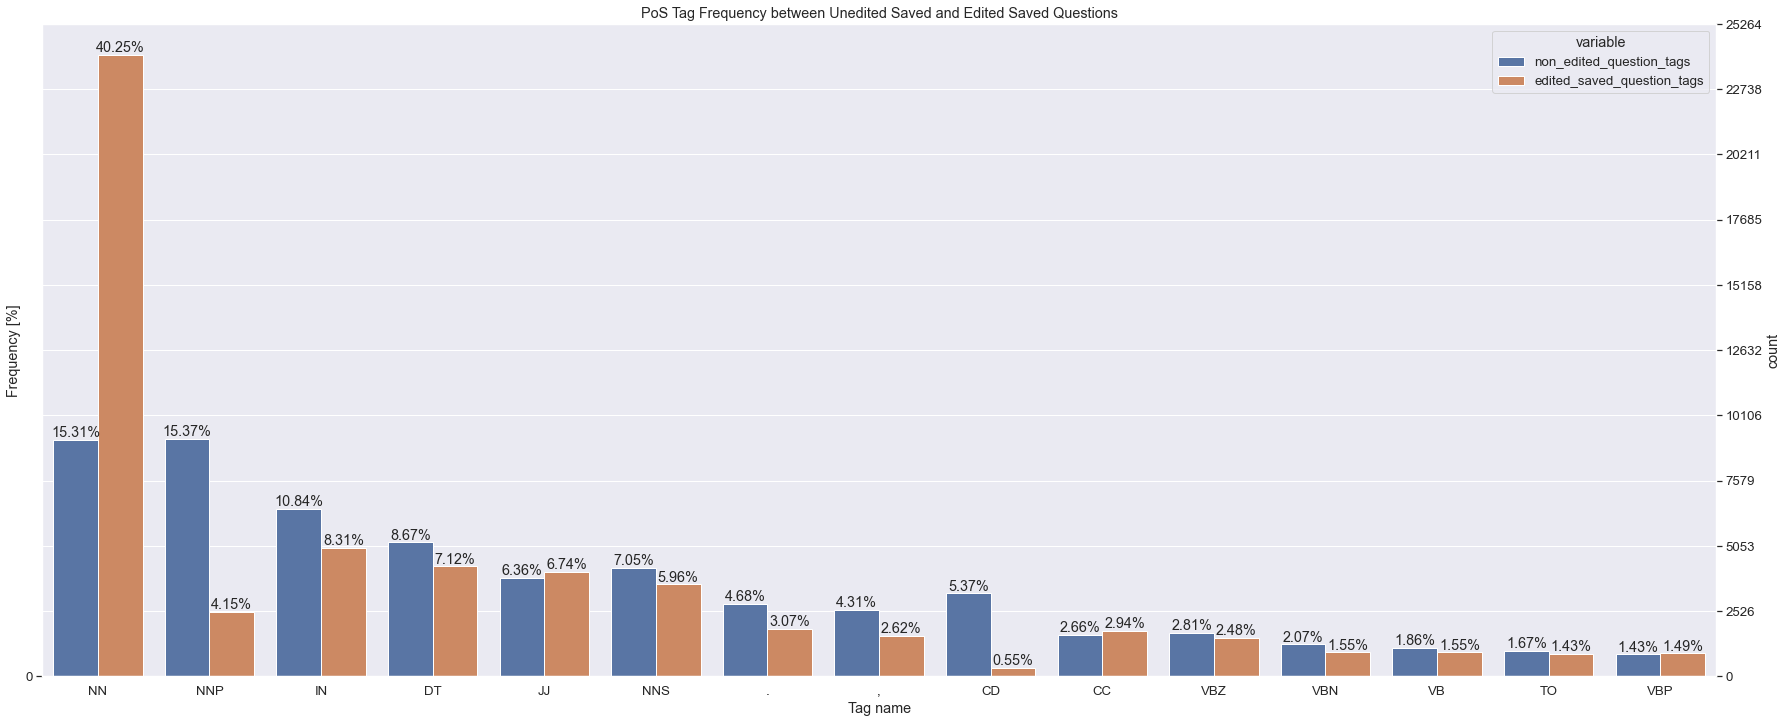

In [297]:
plt.figure(figsize=(30,12))
sns.set(font_scale = 1.2)

ax = sns.countplot(x="value", data=postag_df_temp_melt, hue = 'variable', 
                   order=postag_df_temp_melt.value.value_counts().iloc[:15].index)
plt.title('PoS Tag Frequency between Unedited Saved and Edited Saved Questions')
plt.xlabel('Tag name')

ncount = len(postag_df_temp)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# # Fix the frequency range to 0-100
# ax2.set_ylim(0,100)
# ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [151]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## Named Entity Recognition

In [187]:
import spacy
from spacy import displacy
ner = spacy.load("en_core_web_sm")

/opt/anaconda3/lib/python3.7/site-packages/spacy/util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
ai_generated_question	answer	saved	edited_saved_question

In [298]:
ai_question = df['ai_generated_question'].tolist()
ner_labels = []
for question in ai_question:
    ner_ai_question = ner(question)
    label_list = []
    for word in ner_ai_question.ents:
        label_list.append(word.label_)
    ner_labels.append(label_list)

In [299]:
ner_labels_ai_question = ner_labels

In [300]:
saved_question = df['edited_saved_question'].tolist()
ner_labels_saved_question = []
for question in saved_question:
    ner_question = ner(question)
    label_list = []
    for word in ner_question.ents:
        label_list.append(word.label_)
    ner_labels_saved_question.append(label_list)

In [301]:
ner_labels_saved_question

[['PERSON'],
 [],
 [],
 ['ORG', 'ORG'],
 ['DATE', 'DATE', 'CARDINAL'],
 ['GPE'],
 [],
 ['ORG'],
 ['TIME'],
 [],
 ['PERSON'],
 ['ORDINAL', 'GPE'],
 [],
 ['CARDINAL', 'CARDINAL', 'ORG'],
 [],
 [],
 ['ORG', 'GPE'],
 ['ORG'],
 ['ORG', 'CARDINAL'],
 ['ORG', 'ORG'],
 [],
 [],
 ['ORG', 'PERSON'],
 [],
 ['CARDINAL'],
 [],
 ['ORG'],
 ['ORG'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['DATE'],
 ['PERSON'],
 [],
 ['ORG'],
 [],
 ['ORG'],
 [],
 ['ORG'],
 [],
 [],
 ['DATE'],
 ['ORG'],
 [],
 ['WORK_OF_ART'],
 [],
 [],
 [],
 ['NORP', 'NORP', 'ORG'],
 [],
 [],
 ['PERSON'],
 [],
 [],
 [],
 [],
 [],
 ['ORG', 'DATE'],
 ['ORG'],
 [],
 [],
 [],
 [],
 ['ORG'],
 ['ORG'],
 ['PERSON'],
 [],
 ['CARDINAL', 'ORG'],
 [],
 [],
 [],
 ['DATE', 'PERSON', 'DATE'],
 ['MONEY', 'PERSON', 'ORG', 'MONEY'],
 ['PERSON', 'PERCENT', 'PERCENT'],
 [],
 [],
 [],
 [],
 ['WORK_OF_ART'],
 ['CARDINAL', 'DATE'],
 [],
 ['MONEY', 'CARDINAL', 'MONEY', 'MONEY', 'CARDINAL'],
 ['GPE', 'PERSON'],
 [],
 ['ORG'],
 [],
 ['GPE', 'ORG'],
 ['GPE'],
 [],


In [302]:
#flatten
#flatten list of list
flatten_ai_question_ner = []
for item in ner_labels_ai_question:
    for tags in item:
        flatten_ai_question_ner.append(tags)

In [303]:
#flatten
#flatten list of list
flatten_saved_question_ner = []
for item in ner_labels_saved_question:
    for tags in item:
        flatten_saved_question_ner.append(tags)

In [304]:
#create pos tag dataframe
ner_df = pd.DataFrame({'non_edited_question_ners': pd.Series(flatten_ai_question_ner), 'edited_saved_question_ners': pd.Series(flatten_saved_question_ner)})

In [307]:
ner_df

,non_edited_question_ners,edited_saved_question_ners
0,WORK_OF_ART,PERSON
1,WORK_OF_ART,ORG
2,ORG,ORG
3,MONEY,DATE
4,ORG,DATE
...,...,...
21762,CARDINAL,NaN
21763,ORDINAL,NaN
21764,CARDINAL,NaN
21765,ORG,NaN


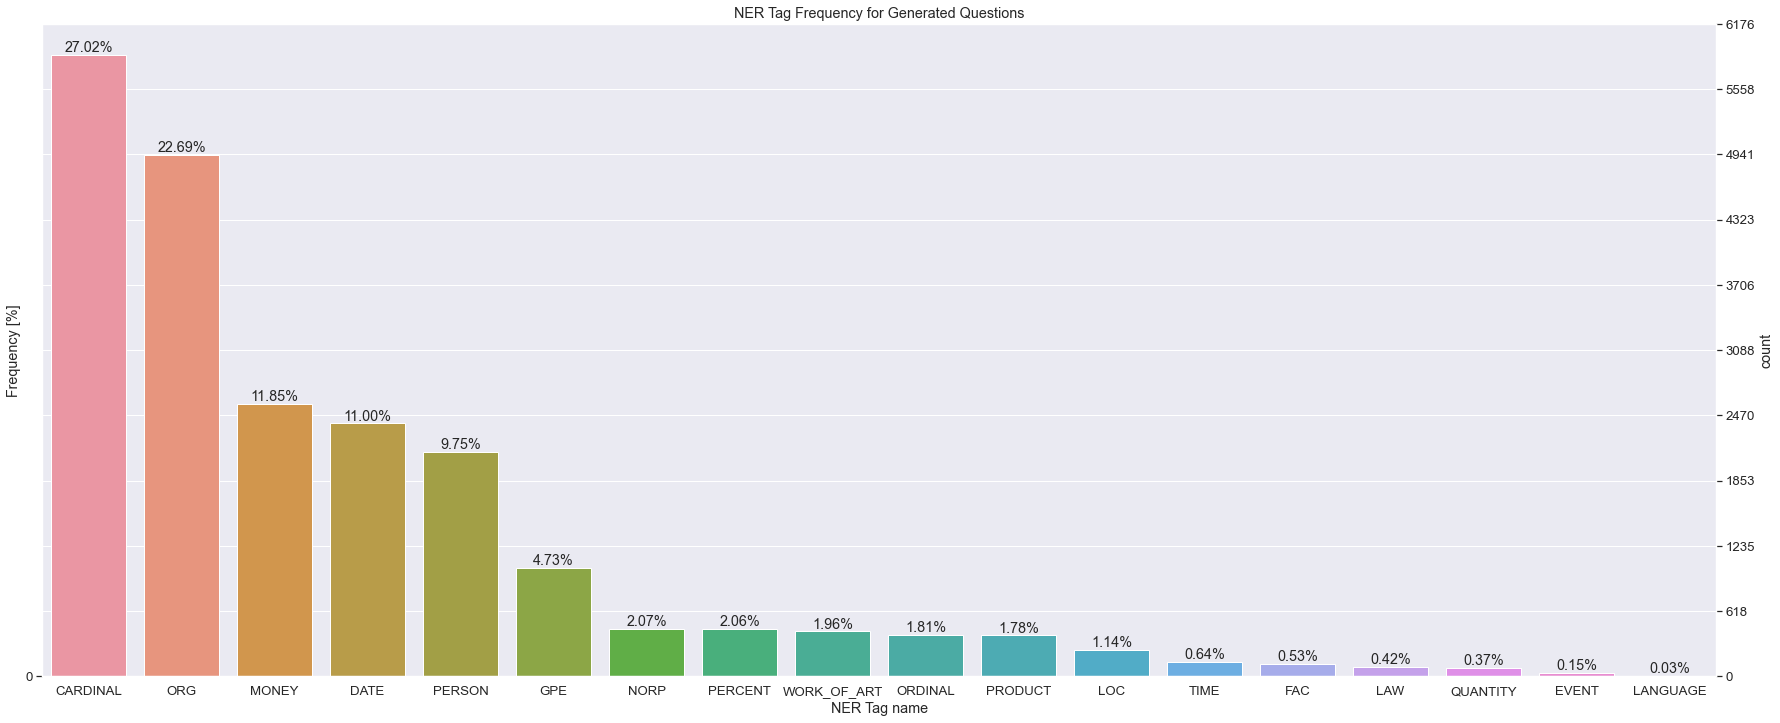

In [305]:
plt.figure(figsize=(30,12))
ax = sns.countplot(x="non_edited_question_ners", data=ner_df, order=ner_df.non_edited_question_ners.value_counts().index)
plt.title('NER Tag Frequency for Generated Questions')
plt.xlabel('NER Tag name')

ncount = sum(ner_df.non_edited_question_ners.notna())
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# # Fix the frequency range to 0-100
# ax2.set_ylim(0,100)
# ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)



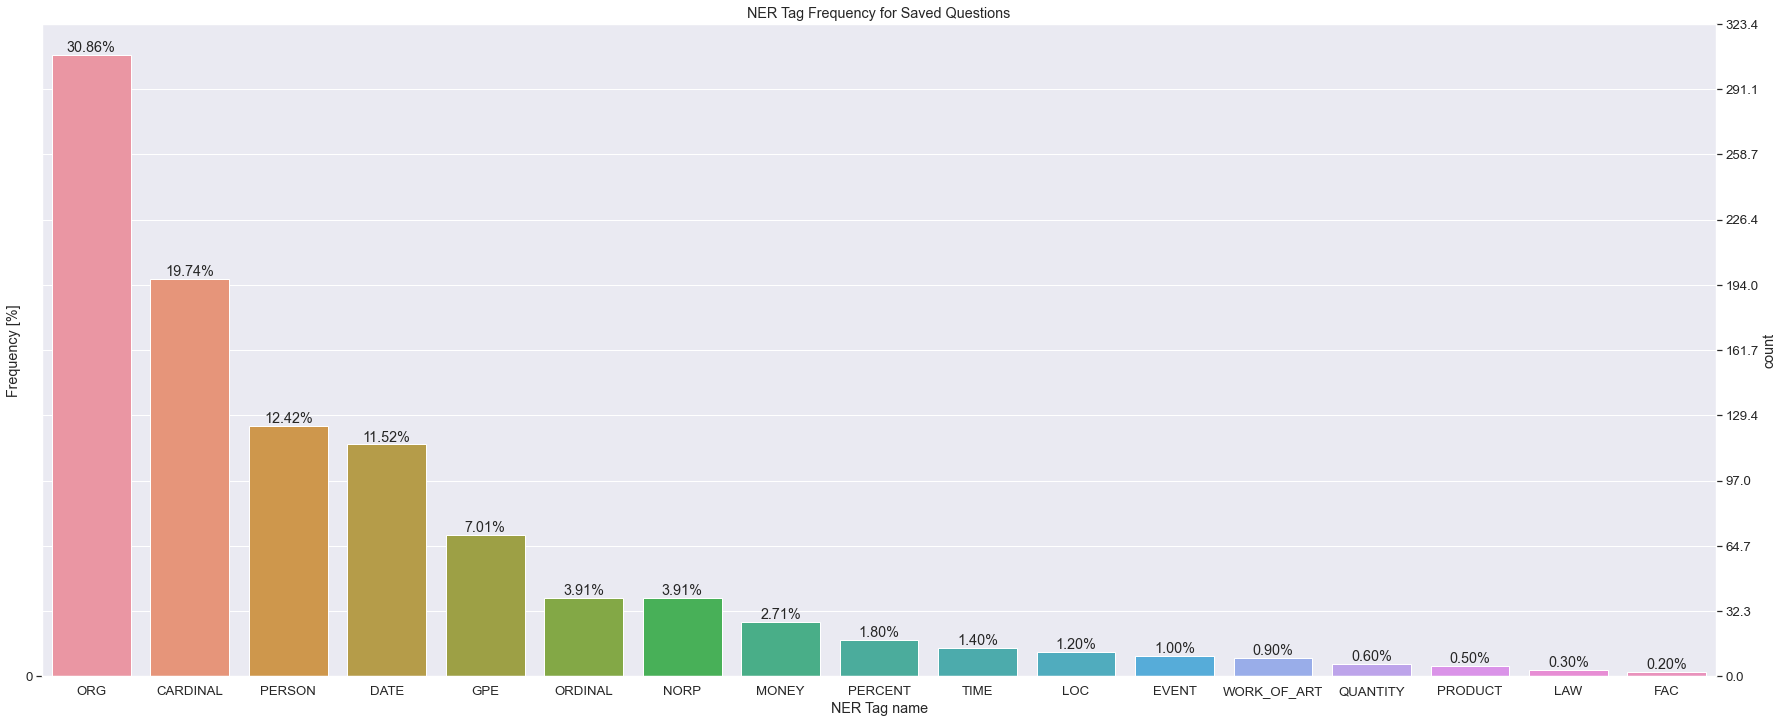

In [308]:
plt.figure(figsize=(30,12))
ax = sns.countplot(x="edited_saved_question_ners", data=ner_df, order=ner_df.edited_saved_question_ners.value_counts().index)
plt.title('NER Tag Frequency for Saved Questions')
plt.xlabel('NER Tag name')

ncount = sum(ner_df.edited_saved_question_ners.notna())
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# # Fix the frequency range to 0-100
# ax2.set_ylim(0,100)
# ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)



In [309]:
melt_df = pd.melt(ner_df.dropna())

In [310]:
melt_df.dropna()

,variable,value
0,non_edited_question_ners,WORK_OF_ART
1,non_edited_question_ners,WORK_OF_ART
2,non_edited_question_ners,ORG
3,non_edited_question_ners,MONEY
4,non_edited_question_ners,ORG
...,...,...
1991,edited_saved_question_ners,CARDINAL
1992,edited_saved_question_ners,DATE
1993,edited_saved_question_ners,GPE
1994,edited_saved_question_ners,ORG


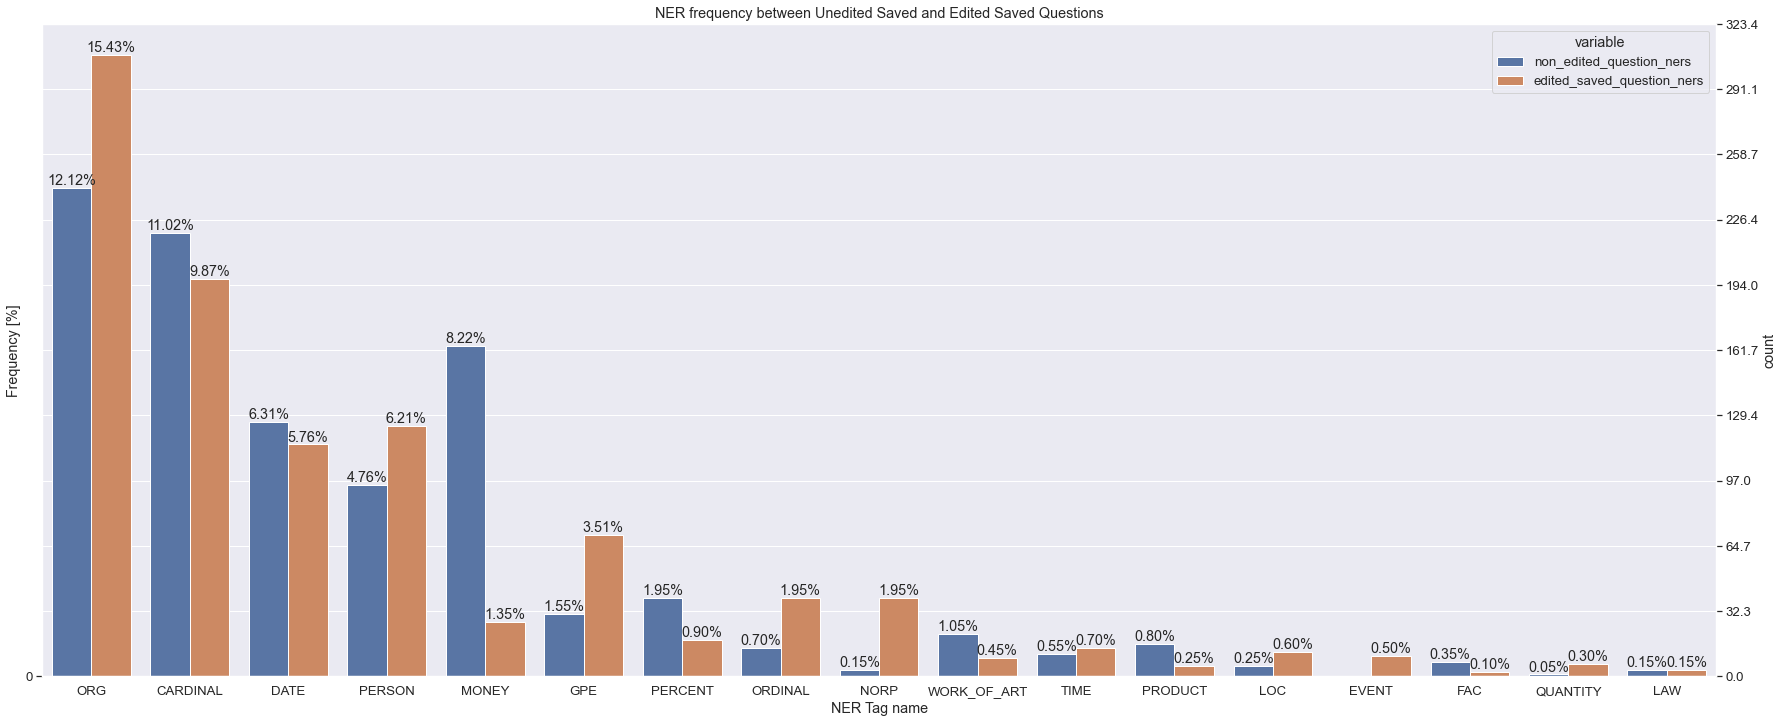

In [311]:
plt.figure(figsize=(30,12))
sns.set(font_scale = 1.2)

ax = sns.countplot(x="value", data=melt_df, hue = 'variable', 
                   order=melt_df.value.value_counts().index)
plt.title('NER frequency between Unedited Saved and Edited Saved Questions')
plt.xlabel('NER Tag name')

ncount = len(melt_df)
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# # Fix the frequency range to 0-100
# ax2.set_ylim(0,100)
# ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

In [243]:
spacy.explain('LAW')

'Named documents made into laws.'